<a href="https://colab.research.google.com/github/AlyssaTang/FutureMakers/blob/main/Extend_data_Wed_MNIST_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# import warnings
import warnings
# filter warnings
warnings.filterwarnings('ignore')

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

# import os
# print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

## Importing Data

In [3]:
from keras.datasets import mnist

In [4]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))

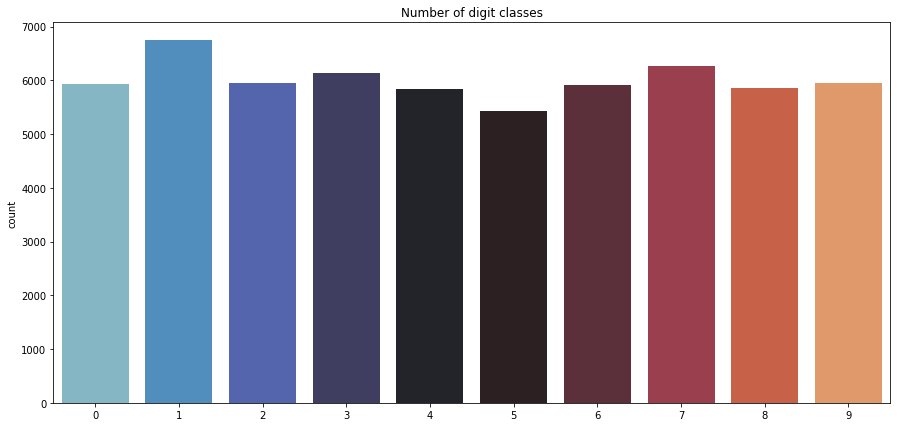

In [5]:
#Plotting # of digit classes
plt.figure(figsize = (15,7))
g = sns.countplot(Y_train, palette='icefire')
plt.title("Number of digit classes")
np.unique(Y_train, return_counts = True)

In [6]:
print(X_train.shape, X_test.shape)

(60000, 28, 28) (10000, 28, 28)


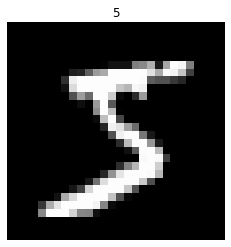

In [7]:
# plot some samples
img = X_train[0]
img = img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(Y_train[0])
plt.axis("off")
plt.show()

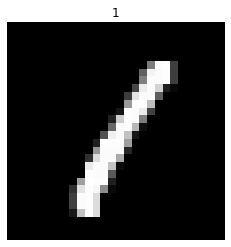

In [8]:
# plot some samples
img = X_train[3]
img = img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(Y_train[3])
plt.axis("off")
plt.show()

In [9]:
# Normalize the data
X_train = X_train / 255.0
X_test = X_test / 255.0
print("x_train shape: ",X_train.shape)
print("test shape: ",X_test.shape)

x_train shape:  (60000, 28, 28)
test shape:  (10000, 28, 28)


In [10]:
# Reshape
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)
print("x_train shape: ",X_train.shape)
print("test shape: ",X_test.shape)

x_train shape:  (60000, 28, 28, 1)
test shape:  (10000, 28, 28, 1)


In [11]:
# Label Encoding 
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
Y_train = to_categorical(Y_train, num_classes = 10)
Y_test = to_categorical(Y_test, num_classes=10)

In [12]:
# Split the train and the validation set for the fitting
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=2)
print("X_train shape",X_train.shape)
print("X_test shape",X_val.shape)
print("Y_train shape",Y_train.shape)
print("Y_test shape",Y_val.shape)

X_train shape (54000, 28, 28, 1)
X_test shape (6000, 28, 28, 1)
Y_train shape (54000, 10)
Y_test shape (6000, 10)


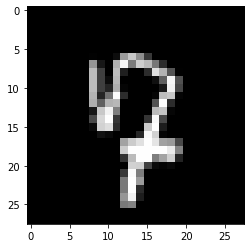

In [13]:
# Some examples
plt.imshow(X_train[2][:,:,0],cmap='gray')
plt.show()

In [14]:
# 
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

model = Sequential()
#
model.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
# fully connected
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [15]:
# Define the optimizer
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

In [16]:
# Compile the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [17]:
epochs = 10  # for better result increase the epochs
batch_size = 250

In [18]:
# # data augmentation
# datagen = ImageDataGenerator(
#         # featurewise_center=False,  # set input mean to 0 over the dataset
#         samplewise_center=False,  # set each sample mean to 0
#         featurewise_std_normalization=False,  # divide inputs by std of the dataset
#         samplewise_std_normalization=False,  # divide each input by its std
#         zca_whitening=False,  # dimesion reduction
#         rotation_range=5,  # randomly rotate images in the range 5 degrees
#         zoom_range = 0.1, # Randomly zoom image 10%
#         width_shift_range=0.1,  # randomly shift images horizontally 10%
#         height_shift_range=0.1,  # randomly shift images vertically 10%
#         horizontal_flip=False,  # randomly flip images
#         vertical_flip=False)  # randomly flip images

# datagen.fit(X_train)

In [19]:
#Data Augumentation = artifically expand X_train by rotating image
datagen = ImageDataGenerator(rotation_range = 5, zoom_range = .1, width_shift_range = .1, height_shift_range = .1)
datagen.fit(X_train)

In [20]:
# Fit the model
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val), steps_per_epoch=X_train.shape[0] // batch_size)

Epoch 1/10
216/216 [==============================] - 61s 212ms/step - loss: 1.4169 - accuracy: 0.5131 - val_loss: 0.1804 - val_accuracy: 0.9503
Epoch 2/10
216/216 [==============================] - 45s 208ms/step - loss: 0.4230 - accuracy: 0.8672 - val_loss: 0.1137 - val_accuracy: 0.9670
Epoch 3/10
216/216 [==============================] - 45s 206ms/step - loss: 0.2997 - accuracy: 0.9054 - val_loss: 0.0918 - val_accuracy: 0.9715
Epoch 4/10
216/216 [==============================] - 45s 208ms/step - loss: 0.2471 - accuracy: 0.9213 - val_loss: 0.0781 - val_accuracy: 0.9755
Epoch 5/10
216/216 [==============================] - 45s 208ms/step - loss: 0.2184 - accuracy: 0.9323 - val_loss: 0.0656 - val_accuracy: 0.9792
Epoch 6/10
216/216 [==============================] - 45s 208ms/step - loss: 0.1973 - accuracy: 0.9379 - val_loss: 0.0620 - val_accuracy: 0.9805
Epoch 7/10
216/216 [==============================] - 45s 209ms/step - loss: 0.1808 - accuracy: 0.9432 - val_loss: 0.0583 - val_ac

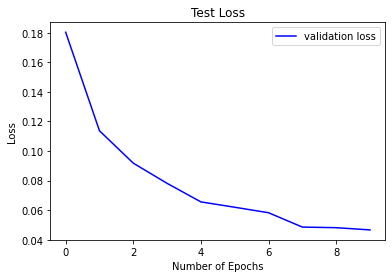

In [21]:
# Plot the loss and accuracy curves for training and validation 
plt.plot(history.history['val_loss'], color='b', label="validation loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

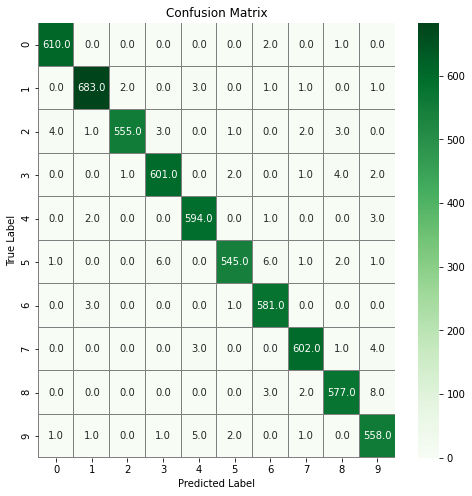

In [22]:
# confusion matrix
import seaborn as sns
# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()